In [14]:
# Packages


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sqlite3
from scipy import stats
from scipy.stats import pearsonr


import statsmodels.api as sm


In [15]:
# Script for query functionality

conn = sqlite3.connect(r"C:\Users\joshd\OneDrive\Desktop\culminating-project-group-2-1\Database\team2_DB.db")

Econ_query = "SELECT * FROM Economic_Indicators"

Eniv_query = "SELECT * FROM Environmental_Indicators"


Econ_df = pd.read_sql_query(Econ_query, conn)
Eniv_df = pd.read_sql_query(Eniv_query, conn)

In [16]:
# query for main df
df_query = """SELECT ec."Country Name",
    ec."Time",
    ec."GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]" as GDP_per_Capita,
    en."Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" as CO2_emissions,
    en."Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" as Renewable_Consumption
FROM Economic_Indicators ec
JOIN Environmental_Indicators en
ON ec."Country Name" = en."Country Name" and ec."Time" = en."Time";""" 

In [17]:
# Create new df from analysis
df = pd.read_sql_query(df_query, conn)

DATA PREPROCESSING

In [18]:
# Remove rows with ".." 
df = df[~df.isin([".."]).any(axis=1)]

In [19]:
# Convert columns to numeric

df['GDP_per_Capita'] = df['GDP_per_Capita'].astype(float)
df['CO2_emissions'] = df['CO2_emissions'].astype(float)
df['Renewable_Consumption'] = df['Renewable_Consumption'].astype(float)

In [20]:
# Find countries with high CO2 emissions

high_co2 = df[df['CO2_emissions'] > 30]
print(high_co2)

    Country Name  Time  GDP_per_Capita  CO2_emissions  Renewable_Consumption
450        Palau  2021     12275.27019      74.734297                    0.9
451        Palau  2022     12129.79743      78.726280                    0.9
477        Qatar  2021     65488.51179      47.093908                    0.0


In [21]:
# Remove outliers

df = df[~df['Country Name'].isin(['Palau', 'Qatar'])]

CORRELATION ANALYSIS

In [22]:
# Define variables

gdp = df["GDP_per_Capita"]
rcon = df["Renewable_Consumption"]
co2 = df["CO2_emissions"]

In [43]:
# Find the correlation between GDP per Capita and CO2 emissions

corr, p_value = pearsonr(gdp, co2)
print(f"Pearson correlation: {corr:.4f}")
print(f"P-value: {p_value:.30f}")


Pearson correlation: 0.4584
P-value: 0.000000000000009279271963079329


In [41]:
# Find correlation between GDP per Capita and Renewable Consumption

corr2, p_value2 = pearsonr(gdp, rcon)
r_squared = corr2**2
print(f"Pearson correlation: {corr2:.4f}")
print(f"P-value: {p_value2:.20f}")
print(f"R-squared: {r_squared:.4f}")

Pearson correlation: -0.3484
P-value: 0.00000000948393556455
R-squared: 0.1214


In [25]:
# Find correlation between CO2 emissions and Renewable Consumption
corr3, p_value3 = pearsonr(co2, rcon)
print(f"Pearson correlation: {corr3:.4f}")
print(f"P-value: {p_value3:.4f}")

Pearson correlation: -0.4081
P-value: 0.0000


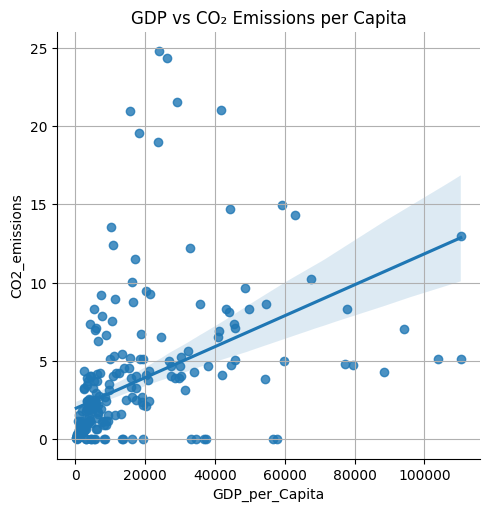

In [26]:
# Lmplot for GDP vs CO2 emissions

sns.lmplot(data=df, x='GDP_per_Capita', y='CO2_emissions',)
plt.title('GDP vs CO₂ Emissions per Capita')
plt.grid(True)
plt.show()

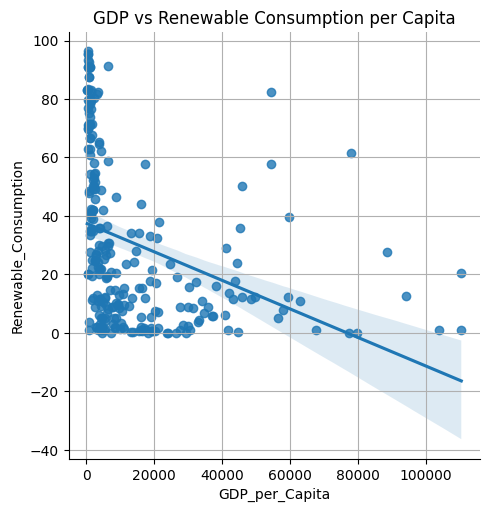

In [27]:
# Lmplot for GDP vs Renewable Consumption

sns.lmplot(data=df, x='GDP_per_Capita', y='Renewable_Consumption',)
plt.title('GDP vs Renewable Consumption per Capita')
plt.grid(True)
plt.show()

In [28]:
# GDP as predictor of CO2 emissions

X1 = df[['GDP_per_Capita']]
y1 = df['CO2_emissions']
X1 = sm.add_constant(X1)

model = sm.OLS(y1, X1).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     67.85
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.28e-15
Time:                        19:43:13   Log-Likelihood:                -714.49
No. Observations:                 257   AIC:                             1433.
Df Residuals:                     255   BIC:                             1440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9600      0.300      6.

In [29]:
# GDP as predictor of Renewable Consumption

X2 = df[['GDP_per_Capita']]
y2 = df['Renewable_Consumption']
X2 = sm.add_constant(X2)

model = sm.OLS(y2, X2).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Renewable_Consumption   R-squared:                       0.121
Model:                               OLS   Adj. R-squared:                  0.118
Method:                    Least Squares   F-statistic:                     35.24
Date:                   Thu, 24 Apr 2025   Prob (F-statistic):           9.48e-09
Time:                           19:43:13   Log-Likelihood:                -1209.3
No. Observations:                    257   AIC:                             2423.
Df Residuals:                        255   BIC:                             2430.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [30]:
# Renewable Consumption as predictor of GDP

X3 = df['Renewable_Consumption']
y3 = df['GDP_per_Capita']
X3 = sm.add_constant(X3)

model = sm.OLS(y3, X3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     35.24
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.48e-09
Time:                        19:43:13   Log-Likelihood:                -2897.8
No. Observations:                 257   AIC:                             5800.
Df Residuals:                     255   BIC:                             5807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.206e+

In [31]:
# CO2 emissions as predictor of GDP

X4 = df['CO2_emissions']
y4 = df['GDP_per_Capita']
X4 = sm.add_constant(X4)

model = sm.OLS(y4, X4).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     67.85
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.28e-15
Time:                        19:43:13   Log-Likelihood:                -2884.1
No. Observations:                 257   AIC:                             5772.
Df Residuals:                     255   BIC:                             5779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7285.9960   1432.247      5.087

In [32]:
# CO2 emissions as predictor of Renewable Consumption

X5 = df['CO2_emissions']
y5 = df['Renewable_Consumption']
X5 = sm.add_constant(X5)

model = sm.OLS(y5, X5).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Renewable_Consumption   R-squared:                       0.167
Model:                               OLS   Adj. R-squared:                  0.163
Method:                    Least Squares   F-statistic:                     50.96
Date:                   Thu, 24 Apr 2025   Prob (F-statistic):           9.81e-12
Time:                           19:43:13   Log-Likelihood:                -1202.5
No. Observations:                    257   AIC:                             2409.
Df Residuals:                        255   BIC:                             2416.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

In [33]:
# Renewable Consumption as predictor of CO2 emissions

X6 = df['Renewable_Consumption']
y6 = df['CO2_emissions']
X6 = sm.add_constant(X6)

model = sm.OLS(y6, X6).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     50.96
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.81e-12
Time:                        19:43:13   Log-Likelihood:                -721.39
No. Observations:                 257   AIC:                             1447.
Df Residuals:                     255   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.30

GDP Total Emissions

In [34]:
data = pd.read_csv(r"C:\Users\joshd\OneDrive\Desktop\GDP_Total_Emissions.csv")

In [35]:
data = data[~data.isin([".."]).any(axis=1)]

data['GDP_per_capita'] = data['GDP_per_capita'].astype(float)
data['Total_Emissions'] = data['Total_Emissions'].astype(float)

In [36]:
high_emissions = data[data['Total_Emissions'] > 30]
print(high_emissions)

data = data[~data['Country Name'].isin(high_emissions['Country Name'])]

     Time Country Name  Total_Emissions  GDP_per_capita
14   2021      Bahrain        42.135918     24086.78478
106  2021       Kuwait        36.185619     26354.94567
150  2021        Palau        78.147669     12275.27019
159  2021        Qatar        57.139458     65488.51179
280  2022      Bahrain        40.995466     25187.14257
372  2022       Kuwait        36.033609     26508.46047
416  2022        Palau        82.335717     12129.79743
425  2022        Qatar        54.364620     64315.62637
546  2023      Bahrain        40.413136     25076.65450
638  2023       Kuwait        34.597418     24155.18723
682  2023        Palau        84.712585     12379.78938
691  2023        Qatar        58.125655     65111.03332


In [37]:
gdp2 = data["GDP_per_capita"]
emissions = data["Total_Emissions"]

corr, p_value = pearsonr(gdp2, emissions)
r_squared = corr**2

print(f"P-value: {p_value:.20f}")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"R-squared: {r_squared:.4f}")

P-value: 0.00000000000000000000
Correlation Coefficient: 0.4646
R-squared: 0.2158


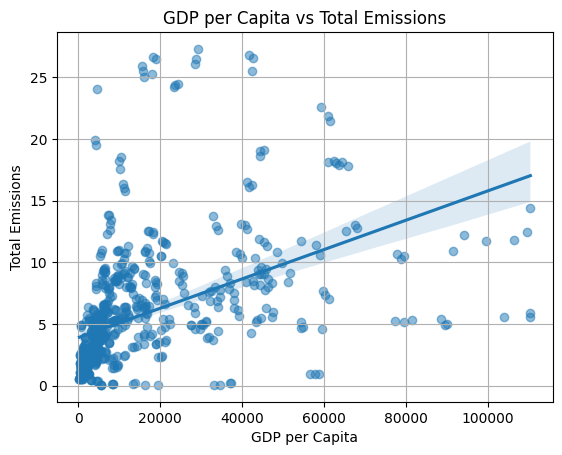

In [38]:
sns.regplot(x='GDP_per_capita', y='Total_Emissions', data=data, scatter_kws={'alpha':0.5})
plt.title('GDP per Capita vs Total Emissions')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

# Predicted values from the regression model
predicted = model.predict(X)

# Calculate MSE
mse = mean_squared_error(emissions, predicted)
print(f"Mean Squared Error: {mse:.4f}")

NameError: name 'X' is not defined

In [ ]:
# Add a constant to the predictor
X = sm.add_constant(gdp2)

# Fit the model
model = sm.OLS(emissions, X).fit()

# Print the summary
print(model.summary())